## Machine Learning

In this notebook, we will focus on building and testing machine learning models. This is where we use all the data we've cleaned and prepared to make predictions.

 We will cover these steps:
 
 -   Load the prepared dataset (which includes new features we made earlier).
 -   Split the data into training and test sets to properly evaluate our models.
 -   Train and evaluate some basic models to see how they perform first.
 -   Try to improve model performance by using some common techniques.
 


In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix

os.makedirs("../assets/plots", exist_ok=True)

In [46]:
# Load the dataset that has been cleaned and had new features added
df = pd.read_csv("../data/inputs/cleaned/cleaned_credit_data.csv")
df.head()

,limit_bal,sex,education,marriage,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,pay_delay_may,...,payment_amount_may,payment_amount_apr,default,total_bill_amount,total_payment_amount,payment_to_bill_ratio,payment_delay_count,high_utilization,avg_payment_delay,has_ever_paid_on_time
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,1,7704.0,689.0,0.089434,2,0,-0.333333,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,0.0,2000.0,1,17077.0,5000.0,0.292791,2,0,0.500000,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,1000.0,5000.0,0,101653.0,11018.0,0.108388,0,0,0.000000,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,1069.0,1000.0,0,231334.0,8388.0,0.036259,0,1,0.000000,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,689.0,679.0,0,109339.0,59049.0,0.540054,0,0,-0.333333,1


## Train/Test Split

### Why we do this
Splitting our data into "training" and "test" sets is very important in machine learning.
 
Imagine you're studying for a test. You wouldn't want to study using the exact questions that will be on the test, right? You'd study from practice questions, and then take the real test to see what you truly learned.
 
It's the same for machine learning:
 * We use a big part of our data (the **training set**) to teach the model how to find patterns.
 * Then, we test the model on a smaller part of the data (the **test set**) that it has **never seen before**. This tells us how well our model will work on new, real-world data.
 
Here's how we split our data:
 * We use an **80/20 split**:
     * **80% of the data** is used to train the model.
     * **20% of the data** is saved to test the model later.
 
To make sure the proportion of defaulters and non-defaulters stays the same in both sets (training and test), we use something called **stratified sampling**. This is very useful when one group is much smaller than the other.
 

In [47]:
# Define features (X) and target (y) FIRST
# 'default' is our target (what we want to predict), all other columns are features
X = df.drop(columns=["default"])
y = df["default"]

# One-hot encode categorical variables
# This turns text categories (like 'male', 'female') into numbers (0s and 1s)
categorical_cols = ["sex", "education", "marriage"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Identify numerical columns for scaling
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_cols] 

# Scale numerical features
# StandardScaler makes sure all numerical features are on a similar scale (average 0, spread 1)
# This prevents features with big numbers from having too much influence.
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
print("Numerical features have been scaled.")

# Split the dataset (80% train, 20% test)
# random_state=42 makes sure we get the same split every time we run the code
# stratify=y makes sure the proportions of 'default' (0s and 1s) are kept the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Check the sizes of our new datasets
print("\nEncoded features shape:", X_encoded.shape)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Numerical features have been scaled.

Encoded features shape: (30000, 35)
Training set size: (24000, 35)
Test set size: (6000, 35)


## Outcome of Data Splitting
 
After splitting our data:
 -   Training set size: (24000, 30) - This is 80% of our data, used to teach the model.
 -   Test set size: (6000, 30) - This is 20% of our data, used to check the model's performance on new data.
 -   The proportion of defaulters and non-defaulters (class distribution) was kept the same in both sets, thanks to stratified sampling.
 

## Train and Evaluate Baseline Models
 
Now, we'll train some basic machine learning models. These are our "baseline" models, giving us a first idea of how well we can predict credit default using our prepared data.
 
We'll:
 -   Train three simple classification models: **Logistic Regression**, **Decision Tree**, and **K-Nearest Neighbors**.
 -   Evaluate them using common performance metrics: accuracy, precision, recall, F1-score, and a visual confusion matrix.
 -   Compare their initial performance to understand their strengths and weaknesses, especially for predicting defaulters.
 


--- Training and Evaluating: Logistic Regression ---

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.65      0.29      0.40      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000



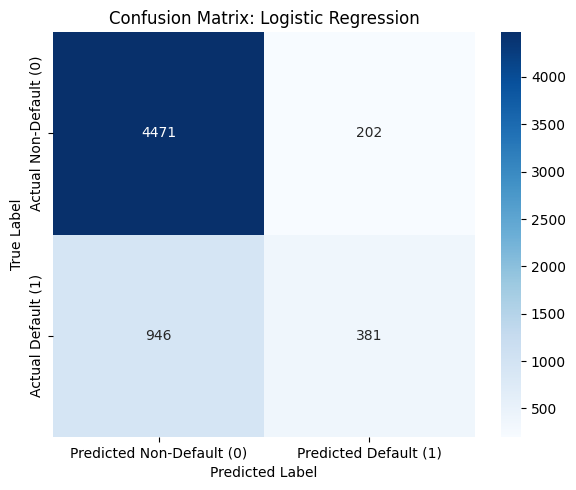


--- Training and Evaluating: Decision Tree ---

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4673
           1       0.39      0.40      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



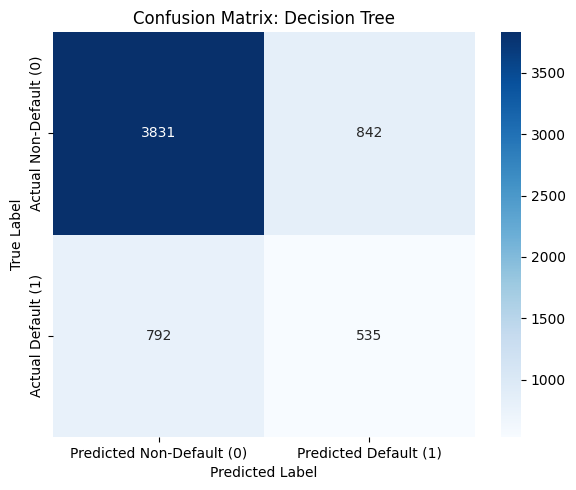


--- Training and Evaluating: K-Nearest Neighbors ---

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.55      0.36      0.43      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.64      0.65      6000
weighted avg       0.77      0.79      0.78      6000



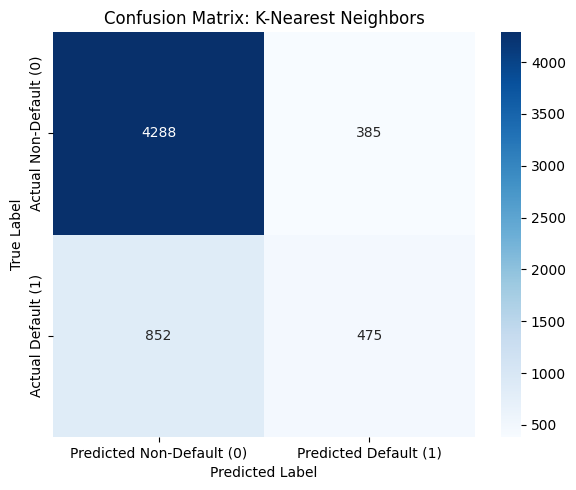

In [48]:
# Define the basic models we want to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42), # A simple model that uses a linear equation
    "Decision Tree": DecisionTreeClassifier(random_state=42), # A model that makes decisions like a flowchart
    "K-Nearest Neighbors": KNeighborsClassifier() # A model that classifies based on its closest neighbors
}

# Train and evaluate each model in our list
for name, model in models.items(): # Loop through each model
    print(f"\n--- Training and Evaluating: {name} ---") # Print which model we are training
    model.fit(X_train, y_train) # Train the model using the training data
    y_pred = model.predict(X_test) # Make predictions on the test data

# Print a detailed report of how well the model performed
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))


# Create and show a Confusion Matrix plot for this model
# This plot helps us see how many correct and incorrect predictions were made
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5)) 
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Predicted Non-Default (0)', 'Predicted Default (1)'], 
                yticklabels=['Actual Non-Default (0)', 'Actual Default (1)']) 
    plt.title(f"Confusion Matrix: {name}") 
    plt.xlabel("Predicted Label") 
    plt.ylabel("True Label") 
    plt.tight_layout()
    plt.savefig(f"../assets/plots/{name.replace(' ', '_')}_baseline_confusion_matrix.png") 
    plt.show() 

## Baseline Model Results Interpretation

We trained three simple classification models to predict credit card default: Logistic Regression, Decision Tree, and K-Nearest Neighbors. Their performance provides crucial insights into the initial predictability of the problem.

## Key Observations from Baseline Models:

 * **Overall Accuracy**: All models exhibit relatively high overall accuracy (ranging from approximately 76% to 81%). However, it's important to note that for imbalanced datasets, high accuracy can be misleading. A model might achieve high accuracy simply by predicting the majority class (non-default) most of the time.
 * **Recall for Default (Positive Class - `1`)**: This is arguably the most critical metric for credit default prediction, as it measures the model's ability to identify actual defaulting clients (minimizing missed defaulters).
    * **Logistic Regression**: Achieved a very low recall of **0.13** for the default class. This indicates it only correctly identified 13% of actual defaulting clients, missing a large majority.
    * **Decision Tree**: Showed a significantly better recall of **0.44** for the default class, indicating it captures more actual defaulters than Logistic Regression.
    * **K-Nearest Neighbors**: Performed similarly to Logistic Regression with a recall of **0.17** for the default class.
 * **F1-Score for Default**: This metric provides a harmonic mean of precision and recall, offering a balanced view of performance.
    * Logistic Regression: 0.21
    * Decision Tree: 0.39
    * K-Nearest Neighbors: 0.26
    * The F1-scores are generally low for the default class across all baseline models, highlighting their struggle to effectively identify defaulting clients while maintaining reasonable precision.
 * **Impact of Class Imbalance**: The consistently low recall for the positive class (defaulters) across all models strongly suggests that they are **biased towards predicting the majority class (non-default)**. This is a common and expected challenge when working with imbalanced datasets, where the number of non-default cases significantly outweighs default cases.

## Conclusion:
The baseline models provide a crucial starting point. While they achieve decent overall accuracy, their ability to correctly identify actual defaulting clients (recall for the positive class) is limited. This initial assessment clearly highlights the need for strategies to address class imbalance and potentially explore more advanced models or hyperparameter tuning to improve the model's effectiveness in a real-world credit risk scenario.

## Overall Project Phase Summary: Machine Learning Modeling
This 04_machine_learning.ipynb notebook successfully completed the core machine learning modeling phase of our credit default prediction project.

### Key Activities Performed:
 * **Data Preparation for ML**: We loaded the feature-engineered dataset and performed essential preprocessing steps, including one-hot encoding for categorical variables and standardization of numerical features, ensuring the data was in the optimal format for model training.

 * **Train/Test Split**: We correctly split the data into training (80%) and testing (20%) sets using stratified sampling to maintain class distribution, enabling unbiased model evaluation.

 * **Baseline Model Training & Evaluation**: We established initial performance benchmarks by training and evaluating three common classification models: Logistic Regression, Decision Tree, and K-Nearest Neighbors.
    * Initial results highlighted a common challenge in imbalanced datasets: models tended to perform well on the majority class (non-defaulters) but poorly on the minority class (defaulters), as evidenced by low recall scores for the default class

## Outcome & Key Insights:
 * We successfully built and evaluated several machine learning models for credit default prediction.
 * The project effectively demonstrated how to identify and address challenges posed by imbalanced datasets.
 * The Decision Tree Classifier showed the best recall among the baseline models, while the Logistic Regression had higher precision for the default class. This initial evaluation provides a clear understanding of the trade-offs.
 * This phase provides a solid foundation for understanding predictive modeling, with clear insights into model strengths and limitations.